In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [36]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [37]:
data.reset_index(inplace=True)

In [38]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.860687,96.761687,93.497151,95.089606,26452900
2757,2022-12-15,90.770073,93.586734,90.003706,93.099046,28298800
2758,2022-12-16,90.431671,91.317475,89.585680,90.770065,48485500


In [39]:
ma_100_days = data.Close.rolling(100).mean()

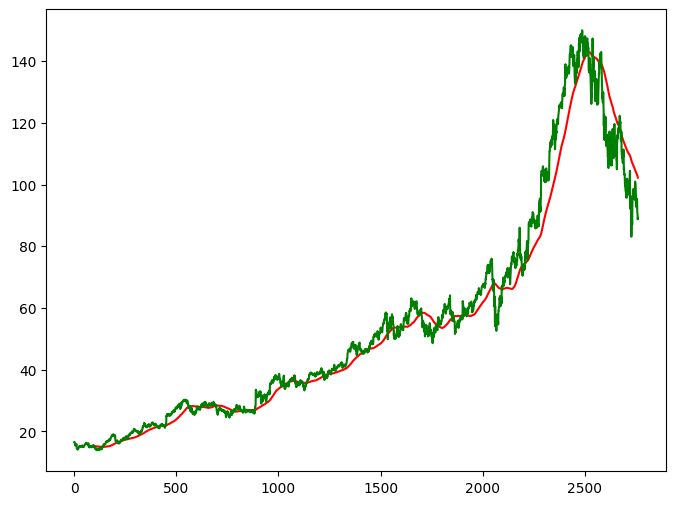

In [40]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [41]:
ma_200_days = data.Close.rolling(200).mean()

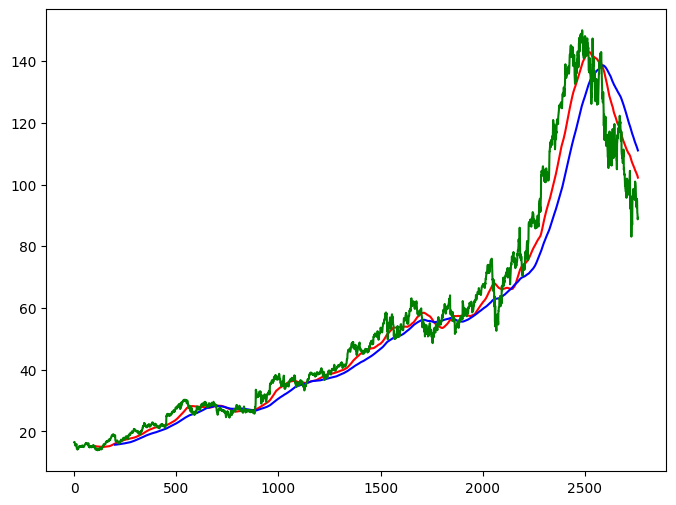

In [42]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [43]:
data.dropna(inplace=True)

In [44]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [45]:
data_train.shape[0]

2208

In [46]:
data_test.shape[0]

553

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [48]:
data_train_scale = scaler.fit_transform(data_train)

In [49]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [50]:
x, y = np.array(x), np.array(y)

In [51]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [52]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\abinash bhoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [54]:
model.fit(x,y, epochs = 100, batch_size =32, verbose =1)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 203ms/step - loss: 0.0806
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 0.0071
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - loss: 0.0063
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - loss: 0.0059
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - loss: 0.0060
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - loss: 0.0053
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - loss: 0.0049
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - loss: 0.0053
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 225ms/step - loss: 0.0043
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - loss: 0.0044
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - loss: 0.0039
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - loss: 0.0039
Epoch 13/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - loss: 0.0043
Epoch 14/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - loss: 0.0038
Epoch 15/100
66/66 ━━━━━━━━━━

In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [56]:
pas_100_days = data_train.tail(100)

In [57]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [58]:
data_test_scale  =  scaler.fit_transform(data_test)

In [59]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [60]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step


In [61]:
scale =1/scaler.scale_

In [62]:
y_predict = y_predict*scale

In [63]:
y = y*scale

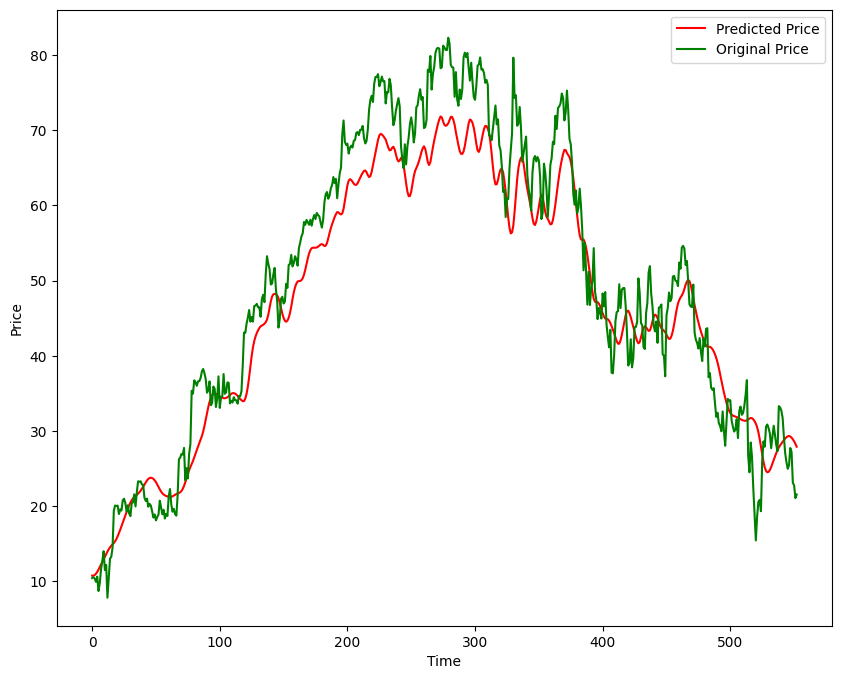

In [64]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [66]:
future_input = data_test_scale[-100:]  
future_input = future_input.reshape(1, 100, 1)

future_predictions = []

for i in range(100):
    next_pred = model.predict(future_input)[0][0]
    future_predictions.append(next_pred)

    future_input = np.append(future_input[:, 1:, :], [[[next_pred]]], axis=1)


future_predictions = np.array(future_predictions).reshape(-1,1)
future_predictions = future_predictions * scale


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/ste

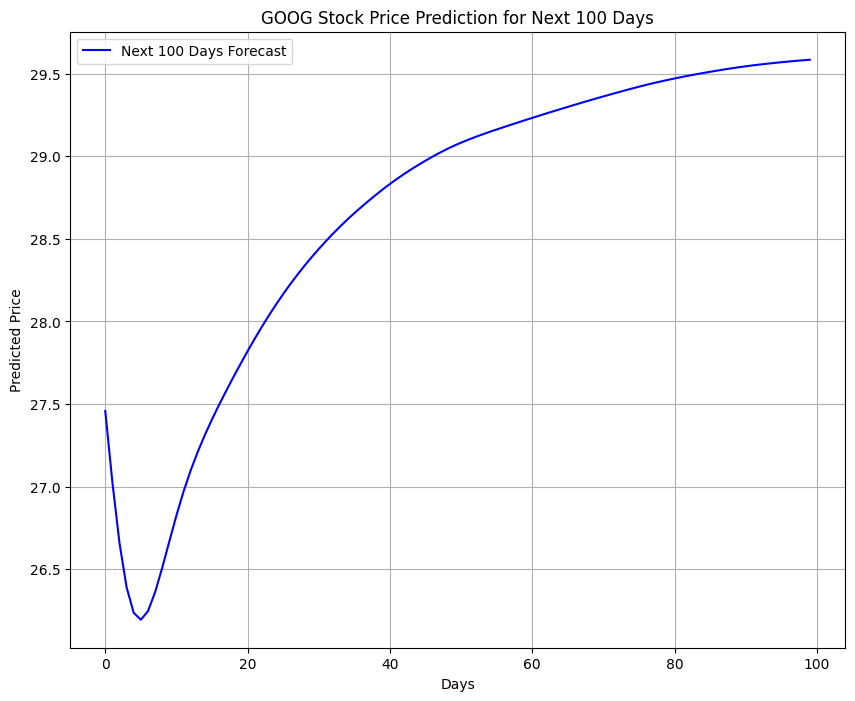

In [67]:
plt.figure(figsize=(10, 8))
plt.plot(future_predictions, color='blue', label='Next 100 Days Forecast')
plt.title('GOOG Stock Price Prediction for Next 100 Days')
plt.xlabel('Days')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid()
plt.show()

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [72]:
# Error Metrics
mae = mean_absolute_error(y, y_predict)
mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_predict)
mape = np.mean(np.abs((y - y_predict) / y)) * 100

print(mae)
print(mse)
print(rmse)
print(r2)
print(mape)


4.637542628653008
31.952434317677394
5.652648433935848
0.9187088851905096
58.78385986666886


In [ ]:
model.save('Stock Predictions Model.keras')